# Phase matching of High Harmonic Generation

A nice description of phase matching can be found in [this thesis](http://www.swinburne.edu.au/engineering/caous/theses/Khuong_thesis.pdf), starting on page 13 (page 22 of the PDF). Also, [this paper](http://www.nature.com/nphoton/journal/v4/n12/full/nphoton.2010.256.html).

### Coherence length
If we ignore absorption, the intensity of the $q^{\mathrm{th}}$ harmonic at the end of the medium is given by

$I_q \propto \frac{ L^2 \sin^2(\Delta k_q L/2)}{\left(\Delta k_q L/2\right)^2}$,

where $L$ is the propagation distance through the medium, $\Delta k_q$ is the phase mismatch of the $q^{\mathrm{th}}$ harmonic. When $\Delta k_q$ is zero, then the intensity increases quadratically with $L$. But, when $\Delta k_q$ is non-zero, there is a finite coherence length over which the harmonics can build up

$L_c = \frac{\pi}{\Delta k_q}$

Here we will define 

$\Delta k_q = qk_L - k_q$,

where $k_L$ is the wave vector of the fundamental driving laser and $k_q$ is the wave vector of the harmonic of order $q$. (**Note: This definition is backwards from some references.**) In the following, will will find $k_q$ and $k_L$ and determine the conditions for which $\Delta k_q$ can be minimized.

### Vacuum term

In addition to the thesis mentioned above, another good reference is [this book](https://books.google.com/books?id=Ad5G1HWtDRgC&pg=PA229&lpg=PA229&dq=hhg+gouy+phase+mismatch&source=bl&ots=i9WBOTgJ4N&sig=laGt5SfJ9tCs2UPWO2bNjZ0SZQY&hl=en&sa=X&ved=0CFIQ6AEwBmoVChMI3aG4-e_-xwIVAxiSCh1MlQOe#v=onepage&q=hhg%20gouy%20phase%20mismatch&f=false). 

In a vacuum, each k-vector has a length given by 

$k_{\mathrm{vac}}=\frac{2\pi}{\lambda}$,

where $\lambda$ is the wavelength of the light. The wavevector for the harmonics ($k_q$) typically remains very close to $k_{\mathrm{vac}}$ since the high energy photons emitted by the HHG process are not significantly affected by either the neutral atoms or the plasma (when compared to the driving laser). Note, that we are not multiplying the k-vector of the laser by $q$, so we are just finding the k-vector of a single photon of the driving laser. Eventually, we will need to multiply this by $q$ to compare to $k_q$.


In [61]:
def k_vac(wavelength):   # wavelength should be in meters
        return 2*np.pi/L  # k is in inverse meters, 

Now let's make a (fairly boring) plot that shows how the magnitude of the k-vector changes with wavelength. First, we set up Python:

In [62]:
%matplotlib inline                   
import numpy as np                   # for math
import matplotlib.pyplot as plt      # for graphs
import mpld3;mpld3.enable_notebook() # interactive graphs
import seaborn; seaborn.set()        # prettier graphs
from ipywidgets import interact

##### Constants:
q  = 1.602e-19    # Coulombs   Charge of electron
c  = 2.99792458e8 # m/s        Speed of light
eo = 8.8541e-12   # C^2/(Nm^2) Permittivity of vacuum
me = 9.109e-31    # kg         Mass of electron

Great, now we can make a plot:

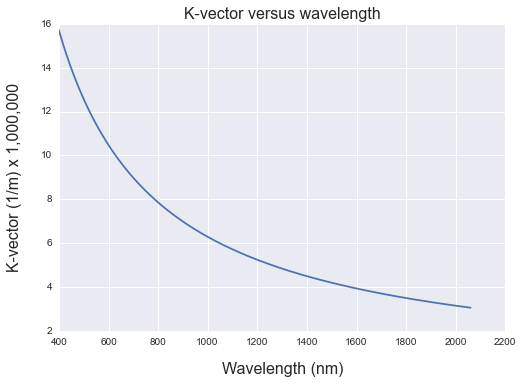

In [63]:
ax = plt.subplot()
L = np.linspace(400e-9,2.06e-6,1000)
ax.set_title('K-vector versus wavelength',fontsize=16)
ax.set_xlabel('Wavelength (nm)',fontsize=16,labelpad=15)
ax.set_ylabel('K-vector (1/m) x 1,000,000',fontsize=16,labelpad=20)
ax.plot(L*1e9,k_vac(L)*1e-6)

### Neutral atom term

The neutral atom term is just related to the refractive index ($n$), scaled by the pressure ($P$): 

$k_\mathrm{neutral} = \frac{2\pi}{\lambda} P \Delta n (1-\eta)$,

where $\lambda$ is the wavelength, $\eta$ is the ionization fraction, and $\Delta n$ is $n-1$, where $n$ is the refractive index. Since refractive indices are usually given at 1 atmosphere of pressure, $P$ is in atmospheres. 

Of course, we could just use $n$ instead of $\Delta n$ in this equation and then we would not need the vacuum term. But, using the vacuum term is traditional.

First we define a function that gives us the refractive index. I used the equation from [The Handbook of Optical Materials by Weber](http://bit.ly/1Jn9RCV) (see page 457 of the PDF).

In [64]:
def RI(L,material='Ar'): 
    # Calculates the refracive index (minus 1). So far only for Ar...
    # L is the wavelength in meters
    if material == 'Ar': # range 0.47–2.06 um
        L = L * 1e6      # convert to micron for this formula
        return (67.86711 + 30182.943*L**2/(144*L**2 - 1)) * 1e-6
    else:
        print 'Material not supported!'   

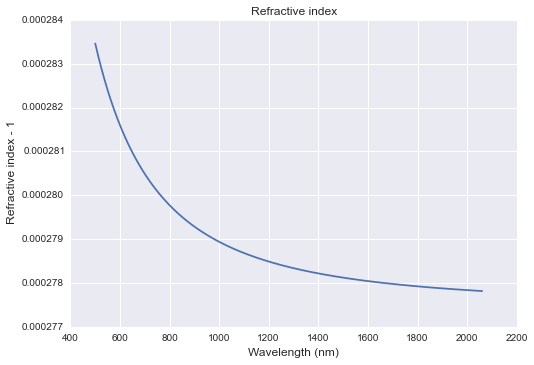

In [65]:
# Test the refractive index function to make sure that it looks okay
ax  = plt.subplot(111)

L = np.linspace(500e-9,2.06e-6,1000)
ax.set_title('Refractive index',fontsize=12)
ax.set_xlabel('Wavelength (nm)',fontsize=12)
ax.set_ylabel('Refractive index - 1',fontsize=12)
ax.plot(L*1e9,RI(L))


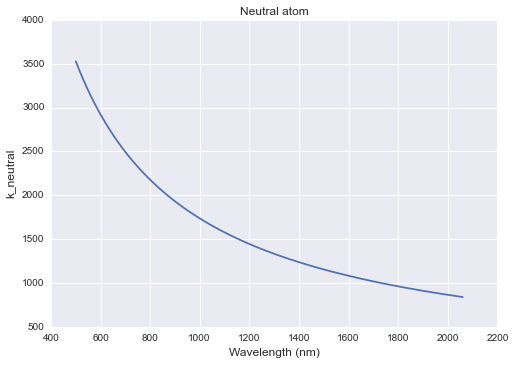

In [66]:
def k_neutral(L,P=1,IF=0.01,gas='Ar'):
    k = P*(1-IF)*RI(L,material=gas)/L *2*np.pi
    return k

fig = plt.figure() 
ax  = plt.subplot(111)

ax.set_title('Neutral atom',fontsize=12)
ax.set_xlabel('Wavelength (nm)',fontsize=12)
ax.set_ylabel('k_neutral',fontsize=12)

L = np.linspace(500e-9,2.06e-6,1000)
plt.plot(L*1e9,k_neutral(L))

### Plasma term

Once the atoms in the gas start to become ionized, the free electrons can have a large effect on the refractive index. In particular, they make a negative contribution to the wave vector, which means that the phase velocity of the light will be faster.

[from Wikipedia](https://en.wikipedia.org/wiki/Number_density#Examples)

In [67]:
def k_plasma(L,P=1,IF=0.01):
    Natm = 0.02504e27
    return -P*IF*Natm*re*L

## Geometric terms


### Waveguide term

In [68]:
def k_waveguide(L,diam=150e-6):
     return -2.405**2 * L/(4*np.pi*(diam/2)**2)

### Free focusing geometry

When harmoincs are generated in a focus, there are several additional terms which arise. First, there is the Gouy phase shift, due to the natural change in phase that occurs through a focus. Next, there is the "dipole phase" term that comes from the z-dependence of the intensity. Finally, since the focus involves light arriving from different angles, noncollinear phase matching is also possible. We will ignore this noncollinear term now, since we will explicitely include it in the "Noncollinear 2-beam" phase matching section below. 

#### Gouy phase

The Gouy phase in the focus of a Gaussian beam is given by 

$\phi_\mathrm{Gouy} = \arctan \left(\frac{z}{z_R}\right)$,

where $z$ is the coordinate along the laser propagation and $z_R$ is the Rayleigh range of the focus, given by

$z_R = \frac{\pi \omega_0^2}{\lambda}$,

where the focal waist dimeter ($2\omega_0$) is given by [Gaussian beam optics](http://www.newport.com/Gaussian-Beam-Optics/144899/1033/content.aspx) 

$$2\omega_0 = \left(\frac{4\lambda}{\pi}\right) \left(\frac{F}{D}\right)$$

The k-vector from the Gouy phase is given by the derivative of the Gouy phase with respect to $z$

$$k_\mathrm{Gouy} = \frac{\partial \phi_\mathrm{Gouy}}{\partial z} = \frac{1}{z_R + \frac{z^2}{z_R}}$$

In [69]:
def k_gouy(L=800e-9,F=300e-3,D=8e-3,z=0):
    # L is the wavelength
    # F is the focal length (in m)
    # D is the beam diameter, in units matching F (just use meters)
    wo = 2*L*F/(np.pi*D)
    zr = np.pi*wo**2/L
    k = 1/(zr + z**2/zr)
    return k

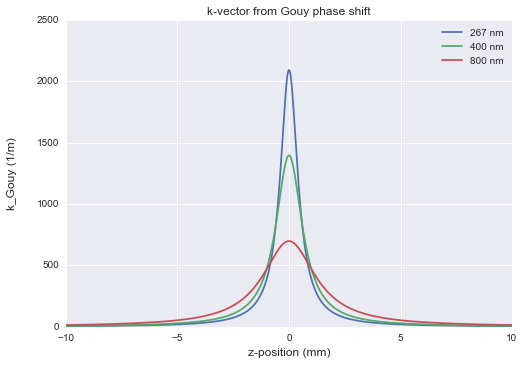

In [70]:
# Make a simple plot of k_Gouy as a function of the z-position
fig = plt.figure() 
ax  = plt.subplot(111)

ax.set_title('k-vector from Gouy phase shift',fontsize=12)
ax.set_xlabel('z-position (mm)',fontsize=12)
ax.set_ylabel('k_Gouy (1/m)',fontsize=12,labelpad=20)

z = np.linspace(-10e-3,10e-3,1000)

for L in (267e-9,400e-9,800e-9):
    ax.plot(z*1e3,k_gouy(L=L,z=z),label='%i nm'%(L*1e9))

leg = plt.legend()

So, the Gouy phase shift is more pronounced for shorter wavelengths, since they have a shorter Rayleigh range. For 800 nm, it's still ~500 $\mathrm{m^{-1}}$, which is a significant fraction of the neutral atom contribution.
Let's also look at the Gouy phase as a function 

#### Atomic dipole phase

$$\Delta \phi_q = -\alpha_q \frac{\partial I}{\partial z} = \frac{8z}{z_R^2 \left[ 1+\left(\frac{2z}{z_R}\right)^2\right]^2}
\alpha_q I_0$$

where $\alpha_q$ is a coefficient relating to the electon trajectories 

$\alpha_q \approx 1-5\times10^{14} \mathrm{cm^2/W}$ for short trajectories

$\alpha_q \approx 20-25\times10^{14} \mathrm{cm^2/W}$ for long trajectories

These values are taken directly from page 21 (page 30 of the PDF file) of [this thesis](http://www.swinburne.edu.au/engineering/caous/theses/Khuong_thesis.pdf). It would be much better to find a paper that provides a better way to calculate these.

So, we can define a function to calculate the atomic dipole phase in terms of this $\alpha_q$ parameter, with presets for long and short trajectories, for which the default is short. 


In [71]:
def k_dipole(L=800e-9,F=300e-3,D=8e-3,z=0,alpha='short',I=1e14):
    # L is the wavelength
    # F is the focal length (in m)
    # D is the beam diameter, in units matching F (just use meters)
    # alpha can be a number, or "short"/"long" to use presets. It's in cm2/W (not SI!)
    # I is the laser intensity, in units to match alpha (W/cm2)
    
    if alpha == 'short':
        alpha = 3e-14
    elif alpha == 'long':
        alpha = 22.5e-14
        
    wo = 2*L*F/(np.pi*D)
    zr = np.pi*wo**2/L
    
    k = -alpha * 8*z*I / ( zr**2*  (1+(2*z/zr)**2)**2)
    return k

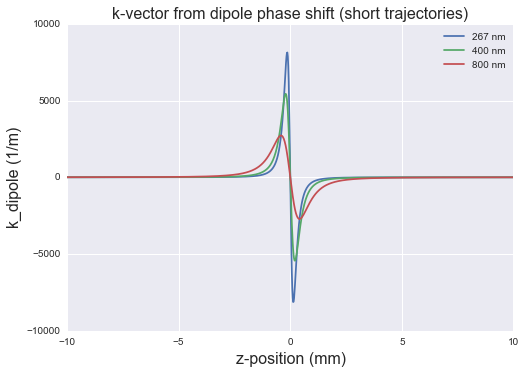

In [72]:
# Make a simple plot of k_dipole as a function of the z-position
fig = plt.figure() 
ax  = plt.subplot(111)

ax.set_title('k-vector from dipole phase shift (short trajectories)',fontsize=16)
ax.set_xlabel('z-position (mm)',fontsize=16)
ax.set_ylabel('k_dipole (1/m)',fontsize=16)

z = np.linspace(-10e-3,10e-3,1000)

for L in (267e-9,400e-9,800e-9):
    ax.plot(z*1e3,k_dipole(L=L,z=z),label='%i nm'%(L*1e9))

leg = plt.legend()

So, for the focal lengths that we are concerned with, the k-vector from the atomic dipole seems to be much larger than the Gouy phase shift, and it changes sign through the focus, which allows for very differnt phase matching conditions before and after the focus. 

## Noncollinear Geometry

To determine the $\Delta k$ in a noncollinear geometry, we simply take the projection of $n_1 k_1$ and $_2 k_2$ along $k_q$, where $n_1$ and $n_2$ are the number of photons absorbed from each beam. 

First, we need to find the angle of $n_1 k_q$. One way to find this is to simply find the projection of $n_1 k_1$ and $n_2 k_2$ along the centerline and the distance of $n_1 k_1$ and $n_2 k_2$ from the centerline and then take the arctangent of these. So,

$\theta_q = \arctan\left(\frac{ k_1 \sin(\theta_1)- n_2 k_2\sin(\theta_1)}{k_1 \cos(\theta_1) + n_2 k_2 \cos(\theta_1)}\right)$

Then we can find the projection of the driving laser wavevectors along the harmonic wavevector:

$k_{\mathrm{proj}} = n_1 k_1\cos(\theta-\theta_q) + n_2 k_2\cos(\theta+\theta_q)$

We can also calculate the k-vector of the harmomics as 

$k_q = \frac{2 \pi}{\lambda_q}$


where $\lambda_q = \left(\frac{n_1}{\lambda_1}+\frac{n_1}{\lambda_2}\right)^{-1}$


In [75]:
def delta_k_NC(angle,n1=20,n2=21,k1=2*np.pi/800e-9,k2=2*np.pi/400e-9,wave1=800e-9,wave2=400e-9):
    # angle is the crossing angle in radians
    # n1/n2 is the number of photons from beam 1/2 (unitless)
    # k1/k2 is the wave vector for one photon of beam 1/2 (units=1/m)
    # wave1/wave2 is the wavelength of beam 1/2 (units = m)
    
    h = n1*k1*np.sin(angle) - n2*k2*np.sin(angle)
    L = n1*k1*np.cos(angle) + n2*k2*np.cos(angle)
    
    angle_q = np.arctan(h/L)
    
    proj_k = n1*k1*np.cos(angle-angle_q) + n2*k2*np.cos(angle+angle_q)
    
    Lq = 1/(n1/wave1+n2/wave2) #calculate the wavelength of the harmonic
    kq = (2*np.pi/Lq)
    
    delta_k = proj_k-kq
    
    return delta_k

Let's test this function by running it with it's default variables (21 photons of 800, 20 photons of 400) as a function of angle:

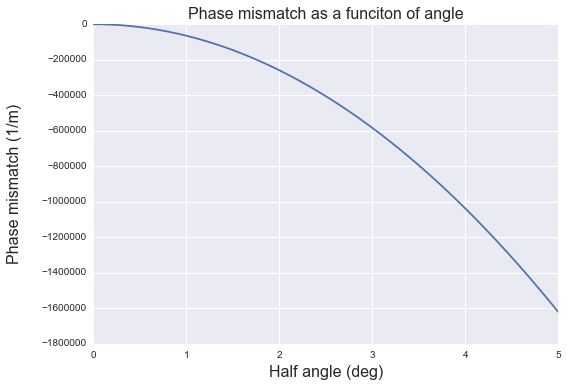

In [76]:
fig = plt.figure() 
ax  = plt.subplot(111)

ax.set_title('Phase mismatch as a funciton of angle',fontsize=16)
ax.set_xlabel('Half angle (deg)',fontsize=16)
ax.set_ylabel('Phase mismatch (1/m)',fontsize=16,labelpad=20)

angle = np.linspace(0,5,1000)

ax.plot(angle,delta_k_NC(angle*np.pi/180))

leg = plt.tight_layout()

Okay, great! As the angle increases, the phase mismatch goes hugely negative. This means that the k-vectors for the driving laser are shorter when projected along the harmonics (i.e., the driving laser is going faster when projected along the harmonics. This makes sense, it's just like when a laser is incident at an angle to a surface. The phase fronts can move across the surface at a speed faster than $c$.  

Now, let's look at the phase mismatch for different SFG (and DFG) spots as a function of different $\Delta n = n_1-n_2$ 

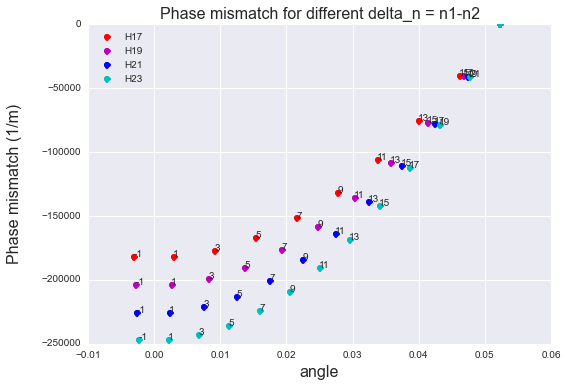

In [85]:
def delta_k_NC(angle,n1=20,n2=21,k1=2*np.pi/800e-9,k2=2*np.pi/400e-9,wave1=800e-9,wave2=400e-9):
    # angle is the crossing angle in radians
    # n1/n2 is the number of photons from beam 1/2 (unitless)
    # k1/k2 is the wave vector for one photon of beam 1/2 (units=1/m)
    # wave1/wave2 is the wavelength of beam 1/2 (units = m)
    
    h = n1*k1*np.sin(angle) - n2*k2*np.sin(angle)
    L = n1*k1*np.cos(angle) + n2*k2*np.cos(angle)
    
    angle_q = np.arctan(h/L)
    
    proj_k = n1*k1*np.cos(angle-angle_q) + n2*k2*np.cos(angle+angle_q)
    
    Lq = 1/(n1/wave1+n2/wave2) #calculate the wavelength of the harmonic
    kq = (2*np.pi/Lq)
    
    delta_k = proj_k-kq
    
    return delta_k, angle_q


fig = plt.figure() 
ax  = plt.subplot(111)

ax.set_title('Phase mismatch for different delta_n = n1-n2',fontsize=16)
ax.set_xlabel('angle',fontsize=16)
ax.set_ylabel('Phase mismatch (1/m)',fontsize=16,labelpad=20)

theta = 3*np.pi/180

for dn in np.arange(-1,25,2):
    for H,color in zip((17,19,21,23),('r','m','b','c')):
        n1 = H/2 + dn/2 + 1
        n2 = H/2 - dn/2
        
        if n1<=0 or n2<=0: continue
#         print '%i=%i and %i=%i (%i+%i)'%(dn,n1-n2,H,n1+n2,n1,n2)
        dk,angle = delta_k_NC(theta,n1=n1,n2=n2,k1=2*np.pi/800e-9,k2=2*np.pi/800e-9,wave1=800e-9,wave2=800e-9)
        ax.plot(angle,dk,'o',color=color)
        ax.annotate('%i'%(dn),xy=(angle,dk),xytext=(angle,dk))
 
ax.plot(theta,0,'o',color='r',label='H17')
ax.plot(theta,0,'o',color='m',label='H19')
ax.plot(theta,0,'o',color='b',label='H21')
ax.plot(theta,0,'o',color='c',label='H23')

leg=plt.legend(loc=2)
leg.draw_frame(False)
plt.tight_layout()
